In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

In [2]:
all_targets = pd.read_csv('../data/0&1/sum_targets_with_panic.csv')

In [3]:
all_targets

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend,dep_score,dep_thoughts,has_dep_diag,prim_diag,secd_diag,panic_score,total
0,1,2,1,1,1,2,0.0,1.0,0,0.0,0.0,0.0,1.0
1,2,2,3,3,1,2,1.0,1.0,0,1.0,0.0,0.0,3.0
2,1,0,1,2,1,1,1.0,1.0,1,1.0,1.0,0.0,5.0
3,2,3,3,3,2,3,1.0,1.0,0,1.0,1.0,0.0,4.0
4,2,3,1,1,2,1,1.0,1.0,0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2,2,2,2,2,1,0.0,1.0,0,0.0,0.0,0.0,1.0
1250,3,3,1,1,1,2,0.0,1.0,0,0.0,0.0,0.0,1.0
1251,3,0,2,2,2,2,0.0,0.0,0,1.0,0.0,0.0,1.0
1252,2,3,1,1,1,2,0.0,1.0,0,0.0,0.0,0.0,1.0


In [5]:
all_targets_copied = all_targets.copy()
total = all_targets_copied['total']
del all_targets_copied['total']

In [6]:
all_targets_copied

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend,dep_score,dep_thoughts,has_dep_diag,prim_diag,secd_diag,panic_score
0,1,2,1,1,1,2,0.0,1.0,0,0.0,0.0,0.0
1,2,2,3,3,1,2,1.0,1.0,0,1.0,0.0,0.0
2,1,0,1,2,1,1,1.0,1.0,1,1.0,1.0,0.0
3,2,3,3,3,2,3,1.0,1.0,0,1.0,1.0,0.0
4,2,3,1,1,2,1,1.0,1.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2,2,2,2,2,1,0.0,1.0,0,0.0,0.0,0.0
1250,3,3,1,1,1,2,0.0,1.0,0,0.0,0.0,0.0
1251,3,0,2,2,2,2,0.0,0.0,0,1.0,0.0,0.0
1252,2,3,1,1,1,2,0.0,1.0,0,0.0,0.0,0.0


In [7]:
total.value_counts()

1.0    523
2.0    287
5.0    189
3.0    149
4.0     68
6.0     38
Name: total, dtype: int64

Text(0.5, 1.0, 'Screen Time and Mental Health')

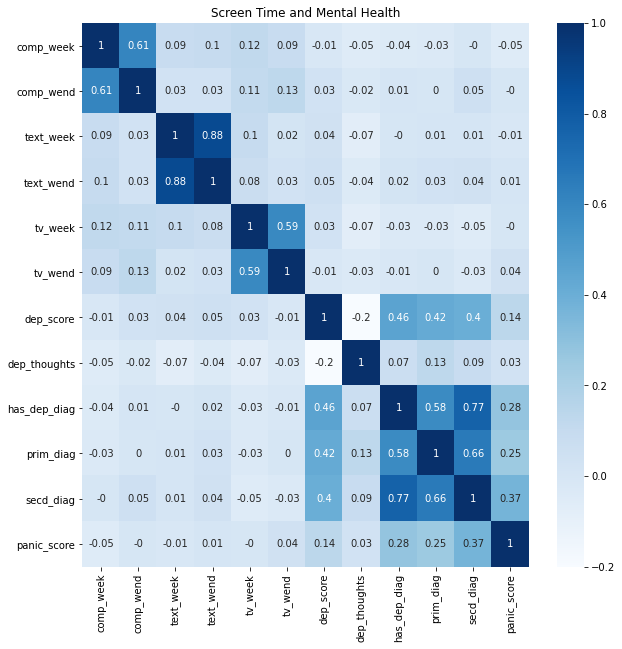

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

X_ds = all_targets_copied.copy()
ds = X_ds.corr()

ds = round(ds,2)

sns.heatmap(ds, annot=True, cmap="Blues")

ax.set_title('Screen Time and Mental Health')

## between y targets

In [9]:
# p-value < 0.05 == confident 
# "A p-value less than 0.05 (typically ≤ 0.05) is statistically significant"

print(stats.pearsonr(X_ds.dep_score, X_ds.dep_score))
print(stats.pearsonr(X_ds.dep_score, X_ds.dep_thoughts))
print(stats.pearsonr(X_ds.dep_score, X_ds.has_dep_diag))
print(stats.pearsonr(X_ds.dep_score, X_ds.prim_diag))
print(stats.pearsonr(X_ds.dep_score, X_ds.secd_diag))
print(stats.pearsonr(X_ds.dep_score, X_ds.panic_score))

(0.9999999999999992, 0.0)
(-0.1978338743867991, 1.5644337894289642e-12)
(0.4558169218957637, 2.3668696847734775e-65)
(0.4164805968686926, 8.715547166920246e-54)
(0.40288838579617103, 3.9203492005386586e-50)
(0.1371788509280754, 1.0826851675678175e-06)


## between Xs and dep_score

In [10]:
print(stats.pearsonr(X_ds.dep_score, X_ds.comp_week))
print(stats.pearsonr(X_ds.dep_score, X_ds.comp_wend))
print(stats.pearsonr(X_ds.dep_score, X_ds.text_week))
print(stats.pearsonr(X_ds.dep_score, X_ds.text_wend))
print(stats.pearsonr(X_ds.dep_score, X_ds.tv_week))
print(stats.pearsonr(X_ds.dep_score, X_ds.tv_wend))

(-0.005294017265292526, 0.8514368973117669)
(0.02726974120207068, 0.3346005503952445)
(0.04225381904733598, 0.1347938800716168)
(0.05435696688746587, 0.05430639110289678)
(0.027770797584075975, 0.3257923092141143)
(-0.01399404332439016, 0.6205399964412679)


## between Xs and dep_thoughts

In [11]:
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.comp_week))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.comp_wend))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.text_week))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.text_wend))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.tv_week))
print(stats.pearsonr(X_ds.dep_thoughts, X_ds.tv_wend))

(-0.050396461550591576, 0.07442586437844267)
(-0.024601117229433145, 0.38406309820207457)
(-0.06733228667020436, 0.017093499191211316)
(-0.03793801842706939, 0.1794017125747734)
(-0.07221696348723383, 0.010523750559188642)
(-0.027595661459467798, 0.32885381397087354)


## between Xs and has_dep_diag

In [12]:
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.comp_week))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.comp_wend))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.text_week))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.text_wend))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.tv_week))
print(stats.pearsonr(X_ds.has_dep_diag, X_ds.tv_wend))

(-0.036799815478512035, 0.19281675061852036)
(0.01328772099422458, 0.6382875439965437)
(-0.0020355305695829514, 0.9425938556779607)
(0.017174844831185445, 0.5434318862807046)
(-0.02703939502435397, 0.3387008454773488)
(-0.014361586799923325, 0.6113905383609677)


## between Xs and prim_diag

In [13]:
print(stats.pearsonr(X_ds.prim_diag, X_ds.comp_week))
print(stats.pearsonr(X_ds.prim_diag, X_ds.comp_wend))
print(stats.pearsonr(X_ds.prim_diag, X_ds.text_week))
print(stats.pearsonr(X_ds.prim_diag, X_ds.text_wend))
print(stats.pearsonr(X_ds.prim_diag, X_ds.tv_week))
print(stats.pearsonr(X_ds.prim_diag, X_ds.tv_wend))

(-0.03409193618689792, 0.22766110891888655)
(0.004407578646471825, 0.8760916095784824)
(0.012204596161491017, 0.6659067293611342)
(0.032519098744636925, 0.24984836428760324)
(-0.034349374666955625, 0.22416745669767485)
(0.003236426619884353, 0.9088462822650236)


## between Xs and secd_diag

In [14]:
print(stats.pearsonr(X_ds.secd_diag, X_ds.comp_week))
print(stats.pearsonr(X_ds.secd_diag, X_ds.comp_wend))
print(stats.pearsonr(X_ds.secd_diag, X_ds.text_week))
print(stats.pearsonr(X_ds.secd_diag, X_ds.text_wend))
print(stats.pearsonr(X_ds.secd_diag, X_ds.tv_week))
print(stats.pearsonr(X_ds.secd_diag, X_ds.tv_wend))

(-0.003423792103870587, 0.903594167680041)
(0.04562437154303143, 0.10633805332486028)
(0.01232312221934871, 0.6628613477045384)
(0.03623574803407986, 0.19973154603953872)
(-0.04680911627832817, 0.09754917072388541)
(-0.028179076157061493, 0.3187274201779543)


## between Xs and panic_score

In [15]:
print(stats.pearsonr(X_ds.panic_score, X_ds.comp_week))
print(stats.pearsonr(X_ds.panic_score, X_ds.comp_wend))
print(stats.pearsonr(X_ds.panic_score, X_ds.text_week))
print(stats.pearsonr(X_ds.panic_score, X_ds.text_wend))
print(stats.pearsonr(X_ds.panic_score, X_ds.tv_week))
print(stats.pearsonr(X_ds.panic_score, X_ds.tv_wend))

(-0.04976020588446159, 0.07816472060073087)
(-0.004001082713126072, 0.8874393668445351)
(-0.005076429876156346, 0.8574762469112169)
(0.005756148377380383, 0.8386392541190969)
(-0.001993453537713067, 0.9437785301573701)
(0.037287482649263556, 0.1869815389897333)


In [ ]:
# P value heatmap 